In [3]:
import pandas as pd
import os

# Specify the directory path where the Excel files are located
directory_path = 'D:\combo_IC50_skew_kurt_data'  # Replace with the actual directory path

# Get a list of Excel files in the specified directory
csv_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

# Loop through the Excel files and concatenate them
for file in csv_files:
    df = pd.read_csv(file)  # Read each Excel file
    concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

# Now, 'concatenated_df' contains the combined data from all Excel files in the specified directory.

# You can further process or save the concatenated DataFrame as needed.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [5]:
X = concatenated_df.drop('Combo IC50', axis = 1)
Y = concatenated_df['Combo IC50']
Y = pd.DataFrame(Y)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 2214)

In [7]:
import numpy as np
import matplotlib

.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
%matplotlib inline


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from tensorflow.keras.optimizers import SGD

# Load your dataset and preprocess it if necessary (X and Y should be defined)

# Split the data into training and testing sets
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2230)

# Define the neural network model
DNN = Sequential()
DNN.add(Dense(2516, input_shape=(X_train.shape[1],), activation='relu'))
DNN.add(Dropout(0.25))  # Dropout layer to prevent overfitting
DNN.add(Dense(3000, activation='relu'))
DNN.add(Dropout(0.25))  # Dropout layer to prevent overfitting
DNN.add(Dense(2000, activation='relu'))
DNN.add(Dropout(0.25))  # Dropout layer to prevent overfitting
DNN.add(Dense(1, activation='linear'))


# Define the learning rate
learning_rate = 0.001  # You can adjust this value as needed

# Compile the model with the specified learning rate
#optimizer = SGD(learning_rate = 0.00100, momentum = 0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
DNN.compile(optimizer=optimizer, loss='mean_squared_error')

# Create a list to store training history for plotting
history = []

# Define a custom callback to track learning rate during training
class LearningRateCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        history.append(DNN.optimizer.lr.numpy())

# Create an instance of the custom callback
lr_callback = LearningRateCallback()

# Train the model
epochs = 50
batch_size = 64

training_history = DNN.fit(
    X_train, Y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.25,
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        lr_callback
    ]
)


# Evaluate the model on the test set
mse = DNN.evaluate(X_test, Y_test)
print(f'Mean Squared Error on Test Data: {mse}')

# Make predictions on the test data
Y_pred = DNN.predict(X_test)

valid_data = pd.read_csv(r'D:\combo_IC50_skew_kurt_data\validation\chunk_14.csv')
X_Valid = valid_data.drop('Combo IC50', axis = 1)
Y_Valid = valid_data['Combo IC50']
Y_Valid = pd.DataFrame(Y_Valid)
# Make predictions on the validation data
Y_Valid_pred = DNN.predict(X_Valid)


r_squared = r2_score(Y_test, Y_pred)
print(f'R-squared (R²): {r_squared}')

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

evs = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", evs)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(DNN, X, Y, cv=8)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)


r_squared = r2_score(Y_Valid, Y_Valid_pred)
print(f'R-squared validation set (R²): {r_squared}')
rmse = np.sqrt(mean_squared_error(Y_Valid, Y_Valid_pred))
print("Root Mean Squared Error:", rmse)
evs = explained_variance_score(Y_Valid, Y_Valid_pred)
print("Explained Variance Score:", evs)
mae = mean_absolute_error(Y_Valid, Y_Valid_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(Y_Valid, Y_Valid_pred)
print("Mean Squared Error:", mse)


# Plot Loss vs. Epochs
plt.figure(figsize=(12, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Plot Learning Rate Schedule
plt.figure(figsize=(12, 6))
plt.plot(history, label='Learning Rate', marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()
plt.grid()
plt.show()

# Plot Validation Loss vs. Training Loss
plt.figure(figsize=(12, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Training Loss')
plt.legend()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a regression plot with a regression line
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'s': 2}, line_kws={'color': 'red'})
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Regression Plot - test set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Create a residual plot
residuals = Y_test - Y_pred
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
plt.scatter(Y_test, residuals, color='red', alpha=0.9, s=2)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot - test set')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Create a regression plot with a regression line
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
sns.regplot(x=Y_Valid, y=Y_Valid_pred, scatter_kws={'s': 2}, line_kws={'color': 'red'})
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Regression Plot - validation set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Create a residual plot
residuals = Y_Valid - Y_Valid_pred
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
plt.scatter(Y_Valid, residuals, color='red', alpha=0.9, s=2)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot - validation set')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


Epoch 1/50
1263/1263 [==============================] - 199s 156ms/step - loss: 4.9531 - val_loss: 7.8493
Epoch 2/50
1263/1263 [==============================] - 197s 156ms/step - loss: 0.9105 - val_loss: 10.8176
Epoch 3/50
1263/1263 [==============================] - 194s 154ms/step - loss: 0.7785 - val_loss: 8.1281
Epoch 4/50
1263/1263 [==============================] - 198s 157ms/step - loss: 0.7567 - val_loss: 7.1313
Epoch 5/50
1263/1263 [==============================] - 195s 154ms/step - loss: 0.7391 - val_loss: 7.1492
Epoch 6/50
1263/1263 [==============================] - 197s 156ms/step - loss: 0.7755 - val_loss: 5.1887
Epoch 7/50
1263/1263 [==============================] - 194s 154ms/step - loss: 0.7406 - val_loss: 8.3600
Epoch 8/50
1263/1263 [==============================] - 193s 153ms/step - loss: 0.7148 - val_loss: 4.9340
Epoch 9/50
1263/1263 [==============================] - 194s 154ms/step - loss: 0.7888 - val_loss: 7.3746
Epoch 10/50
1263/1263 [======================

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.src.engine.sequential.Sequential object at 0x000001E69F8F7810> does not.

Cross-Validation Scores: [0.98100969 0.97928717 0.97698105 0.98159414 0.97917299 0.97928139
 0.98040538 0.97851529]
R-squared validation set (R²): 0.9229570645677593
Root Mean Squared Error: 0.9276191062603968
Explained Variance Score: 0.9607368898400968
Mean Absolute Error: 0.7719705610760617
Mean Squared Error: 0.8604772062993372


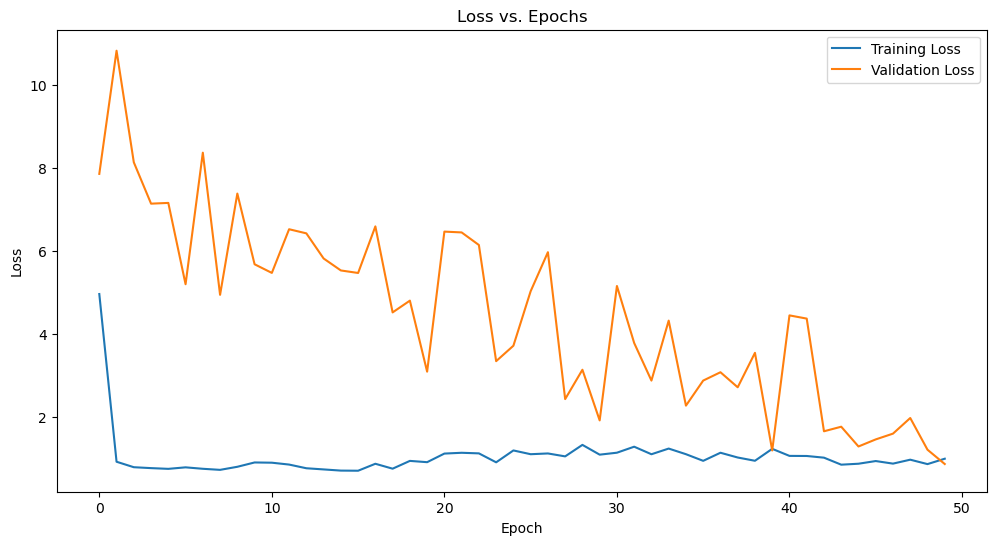

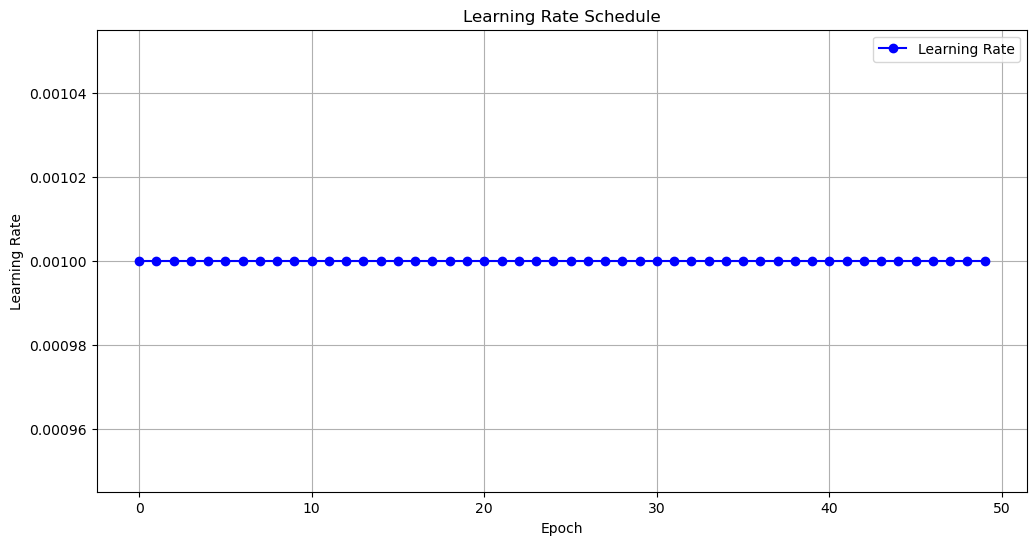

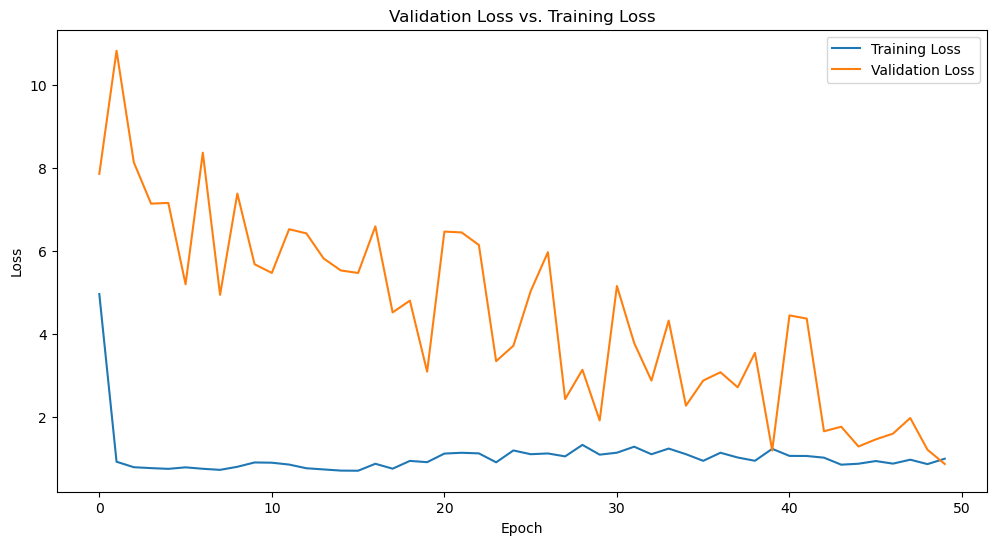

C:\Users\Admin\AppData\Local\Temp\ipykernel_3400\1484456994.py:57: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


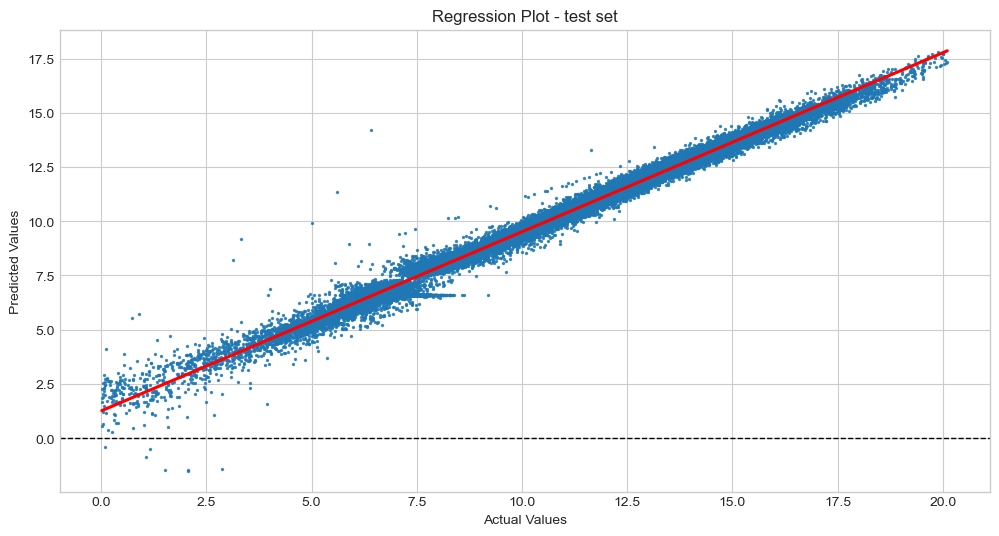

C:\Users\Admin\AppData\Local\Temp\ipykernel_3400\1484456994.py:69: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


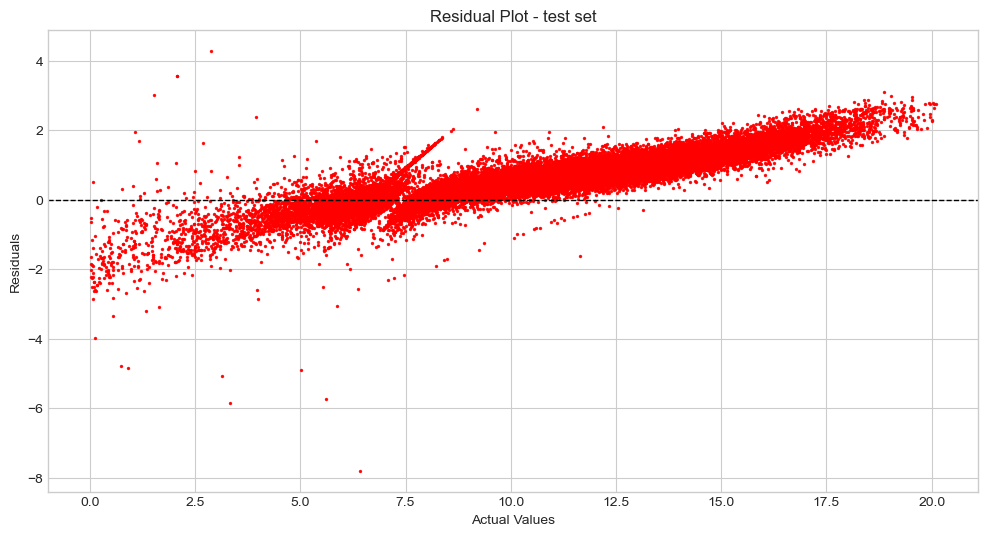

C:\Users\Admin\AppData\Local\Temp\ipykernel_3400\1484456994.py:80: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


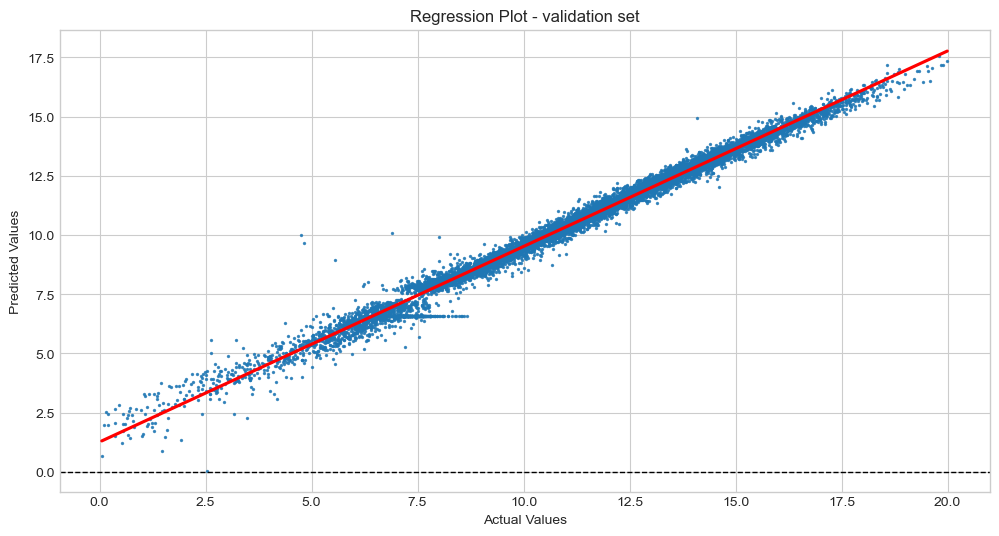

C:\Users\Admin\AppData\Local\Temp\ipykernel_3400\1484456994.py:92: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


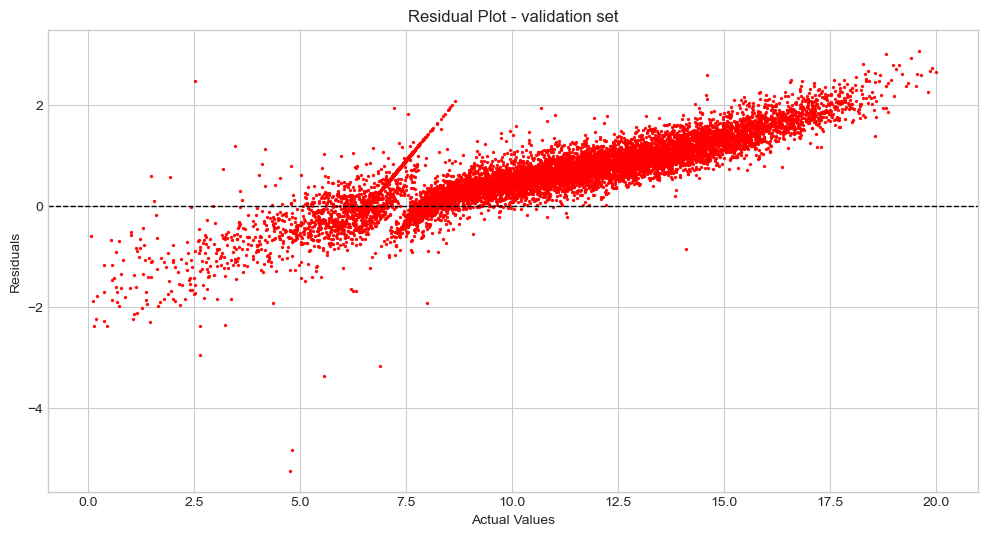

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=8)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)


r_squared = r2_score(Y_Valid, Y_Valid_pred)
print(f'R-squared validation set (R²): {r_squared}')
rmse = np.sqrt(mean_squared_error(Y_Valid, Y_Valid_pred))
print("Root Mean Squared Error:", rmse)
evs = explained_variance_score(Y_Valid, Y_Valid_pred)
print("Explained Variance Score:", evs)
mae = mean_absolute_error(Y_Valid, Y_Valid_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(Y_Valid, Y_Valid_pred)
print("Mean Squared Error:", mse)


# Plot Loss vs. Epochs
plt.figure(figsize=(12, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Plot Learning Rate Schedule
plt.figure(figsize=(12, 6))
plt.plot(history, label='Learning Rate', marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()
plt.grid()
plt.show()

# Plot Validation Loss vs. Training Loss
plt.figure(figsize=(12, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Training Loss')
plt.legend()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a regression plot with a regression line
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'s': 2}, line_kws={'color': 'red'})
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Regression Plot - test set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Create a residual plot
residuals = Y_test - Y_pred
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
plt.scatter(Y_test, residuals, color='red', alpha=0.9, s=2)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot - test set')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Create a regression plot with a regression line
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
sns.regplot(x=Y_Valid, y=Y_Valid_pred, scatter_kws={'s': 2}, line_kws={'color': 'red'})
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Regression Plot - validation set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Create a residual plot
residuals = Y_Valid - Y_Valid_pred
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
plt.scatter(Y_Valid, residuals, color='red', alpha=0.9, s=2)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot - validation set')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [ ]:
valid_data = pd.read_csv(r'D:\combo_IC50_skew_kurt_data\validation\chunk_14.csv')
X_valid = valid_data.drop('Combo IC50', axis = 1)
Y_valid = valid_data['Combo IC50']

# Make predictions on the validation data
Y_valid_pred = DNN.predict(X_valid)


r_squared = r2_score(Y_test, Y_pred)
print(f'R-squared (R²): {r_squared}')

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

evs = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", evs)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=8)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)




In [ ]:
r_squared = r2_score(Y_valid, Y_valid_pred)
print(f'R-squared (validation set) (R²): {r_squared}')
rmse = np.sqrt(mean_squared_error(Y_valid, Y_valid_pred))
print("Root Mean Squared Error (validation set):", rmse)
mse = mean_squared_error(Y_valid, Y_valid_pred)
print("Mean Squared Error (validation set):", mse)
evs = explained_variance_score(Y_valid, Y_valid_pred)
print("Explained Variance Score (validation set):", evs)



# Plot Loss vs. Epochs
plt.figure(figsize=(12, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Plot Learning Rate Schedule
plt.figure(figsize=(12, 6))
plt.plot(history, label='Learning Rate', marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()
plt.grid()
plt.show()

# Plot Validation Loss vs. Training Loss
plt.figure(figsize=(12, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Training Loss')
plt.legend()
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Create a scatterplot with regression line and confidence interval
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'s': 15}, ci=95)

# Add labels and a title
plt.xlabel("Actual Values", fontsize=30)
plt.ylabel("Predicted Values", fontsize=30)
plt.title("Combo IC50 Regression Plot", fontsize=30)

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

# residual plot

Y_test = np.array(Y_test)
Y_test = np.ravel(Y_test)
Y_pred
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Calculate residuals
residuals = Y_test - Y_pred
residuals = pd.DataFrame(residuals)
residuals = np.ravel(residuals)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and residuals 'residuals'
# Replace 'y_pred' and 'residuals' with your actual data

# Check the dimensions of 'y_pred' and 'residuals'
print(len(Y_pred), len(residuals))

# Create a residual plot
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

# Specify the color for the residual points (e.g., 'lightcoral')
sns.residplot(x=Y_pred, y=residuals, scatter_kws={'s': 8, 'color': 'purple'})

plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Add labels and a title with increased font size
plt.xlabel("Predicted Values", fontsize=24)  # Adjust fontsize as needed
plt.ylabel("Residuals", fontsize=24)  # Adjust fontsize as needed
plt.title(" Combo IC50 Residual plot", fontsize=30)  # Adjust fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# plots for validation set
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Create a scatterplot with regression line and confidence interval
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.regplot(x=Y_valid, y=Y_valid_pred, scatter_kws={'s': 15}, ci=95)

# Add labels and a title
plt.xlabel("Actual Values", fontsize=30)
plt.ylabel("Predicted Values", fontsize=30)
plt.title("Combo IC50 Regression Plot (validation set)", fontsize=30)

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

# residual plot

Y_valid = np.array(Y_valid)
Y_valid = np.ravel(Y_valid)
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Calculate residuals
residuals = Y_valid - Y_valid_pred
residuals = np.array(residuals)
residuals = np.ravel(residuals)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and residuals 'residuals'
# Replace 'y_pred' and 'residuals' with your actual data

# Check the dimensions of 'y_pred' and 'residuals'
print(len(Y_valid_pred), len(residuals))

# Create a residual plot
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

# Specify the color for the residual points (e.g., 'lightcoral')
sns.residplot(x=Y_valid_pred, y=residuals, scatter_kws={'s': 8, 'color': 'purple'})

plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Add labels and a title with increased font size
plt.xlabel("Predicted Values", fontsize=24)  # Adjust fontsize as needed
plt.ylabel("Residuals", fontsize=24)  # Adjust fontsize as needed
plt.title(" Combo IC50 Residual plot (validation set)", fontsize=30)  # Adjust fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()
